## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#first import data set using read_csv():
df = pd.read_csv('ab_data.csv')
#Then use head to show the first 5 rows:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
#To define how many rows in this data set:
#To know column use shape[1] while to know rows number use shape [0] 
df.shape[0]

294478

In [5]:
#To define how many column in this data set:
df.shape[1]

5

This dataset containts 294478 rows (subjects) with thier data arranged in five different column. 

c. The number of unique users in the dataset.

In [6]:
#For unique value we can use:
# df.user_id.nunique() or df['user_id'].nunique():
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
#First obtain converted mean:
df.converted.mean()

0.11965919355605512

In [8]:
#Second multibly it with 100 to gain the proportion:
#(this two steps could be done in one but for further information I prefered to seperate them)
df['converted'].mean()*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
#First count all values wehre new_page and control are matched:
newcontrol = df.query('landing_page == "new_page" and group == "control"').count()

In [10]:
#second, count all value where old page and treatment are matched:
oldtreatment = df.query('landing_page == "old_page" and group == "treatment"').count()

In [11]:
#Finally sum both values:
newcontrol + oldtreatment

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

So, in this dataset 3893 new page and treatment were not aligned.

f. Do any of the rows have missing values?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


From previous enquiry it shows that there is no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
#We need to find all treatment that is not alligned with new page or (bitwise or) control that not alligned with old_page: 
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | ((df.group == 'control') & (df.landing_page == 'old_page'))]

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
#If we use duplicated function to the whole data set it will give a result of 0 which mean there is no identical row.
df2.duplicated().sum()

0

In [17]:
#Now I will try to check for an exact column:
df2.user_id.duplicated().sum()

1

In [18]:
#To know exactly which item is duplicate I will use loc function:
df2.loc[df2.user_id.duplicated(),:]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
df2.loc[df2.user_id.duplicated(),:]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
#To drop duplicate using row information:
df2 = df2.drop(2893)

In [21]:
#To ensure that duplication is already removed:
df2.duplicated(['user_id']).sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
#Using smae function as the one we used with df but changing dataset name:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
#To find control individuals who converted:
df2[df2['group'] == "control"]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
#To find treatment individuals who converted:
df2[df2['group'] == "treatment"]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
#To find individuals who recived new page:
(df2.landing_page == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.  

In [26]:
(df2.landing_page == "old_page").mean()

0.4999380557773312

**Old page conerting rate (0.49) is better than new page converting rate (0.5), though it is not possible to say that new page is affecting the converting rate because the differance is only 0.1**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 
$$ H0: p_n - p_o <= 0 $$
$$ H1: p_n - p_o >0 $$ 


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
#Define Pnew as Pn and Pold as Po:
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
#Define Pold as Po:
Pold = df2.converted.mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [29]:
#Define n_new as Nn where landing page is always new page:
Nnew = df2.query('landing_page == "new_page"').shape[0] 
Nnew

145310

d. What is $n_{old}$?

In [30]:
#Define n_old as No where landing page is always old page:
Nold = df2.query('landing_page == "old_page"').shape[0] 
Nold


145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
#Define new page converted as NPC using numpay random binomial:
New_PC = np.random.binomial(Nnew, Pnew) / Nnew
New_PC

0.12103778129516207

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
#Define old page converted as OPC using numpay random binomial:
Old_PC = np.random.binomial(Nold, Pold) / Nold
Old_PC

0.12022798298387874

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
#Find 𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑 :
New_PC - Old_PC

0.0008097983112833329

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [37]:
#First, find new page converted and old page converted but this time for 1000 value,
#Then calculate p_diff by subtract OldC from NewC: 

p_diffs = []
NewC = np.random.binomial(Nnew, Pnew, 10000) / Nnew
OldC = np.random.binomial(Nold, Pold, 10000) / Nold
p_diffs = NewC - OldC

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   6.,   70.,  399., 1442., 2860., 2992., 1648.,  485.,   86.,
          12.]),
 array([-4.93023851e-03, -3.95838865e-03, -2.98653880e-03, -2.01468894e-03,
        -1.04283909e-03, -7.09892320e-05,  9.00860623e-04,  1.87271048e-03,
         2.84456033e-03,  3.81641019e-03,  4.78826004e-03]),
 <a list of 10 Patch objects>)

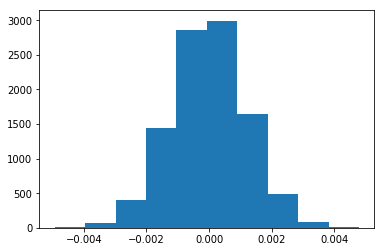

In [38]:
#using matplot lip function plt.hist to visualzie the resutl:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [141]:
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

actual_cvt_new = convert_new/ Nnew
actual_cvt_old = convert_old/ Nold

a_diff = actual_cvt_new - actual_cvt_old

In [142]:
#Calculate the mean of greater values:
(p_diffs > a_diff).mean()

0.9052

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value known as p-value. The higher p-value is, the more significant null hypothesis is (we ca not reject the null hypothesis) . In this case 0.902 is a high p-value which mean null hypothesis of this study is scientifically  significant and we can't reject it. Null hypothesis of this study indicates that new page is  in not improving converting rate, so accepting this means that there is no benefit of changing from old to new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [143]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0] 
n_new = df2.query('landing_page == "new_page"').shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [144]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value and z-score from this data are 0.9 and 1.31 respectively. For z-score it is the measure of how many standard deviations below or above the population mean a raw score. For any hypothesis z-score suppose to be more than 1.96 to reject the null hypothesis. In this case our z-score is 1.31 which is less than 1.96 so we can't reject null hypothesis and this match our finding in j. In addition, p-value is 0.9 and as explained before the higher the p-value the more significant the null hypothesis is.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [145]:
#Define ab_page values as 0 and 1:
def ab_page(x):
    if x == 'treatment':
        return 1
    if x == 'control':
        return 0

In [146]:
#First treatment and control would be replaced by 1 and 0:
df2['ab_page']= df2['group'].apply(ab_page)
df2['ab_page'] = pd.to_numeric(df2['ab_page'])

In [147]:
#Define intercept: 
import statsmodels.api as sm
df2['intercept'] = 1
#To mkae sure all previous are added correctly 
df2.head(5)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [148]:
#Define logit with python statsmodels as logistic regression:
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [149]:
#To have summery we need first to fit the model using maximum likelihood: 
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:22:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**In this part p-value = 0.19 and as explained before this mean should reject null hypothesis. Though, null hypothesis of this part sate that there is no impact of new or old page on the converting rate. While alternate hypothesis state there is a difference in the impact of new or old page on converting rate. So, rejecting null hypothesis means there is a different impact on converting rate which match our findings in previous part.

In part II it's a one tailed test. Our hypothesis was studying wither factor has an increasing effect on the result or a decreasing effect .
Ho: New page has increased converting rate. 
H1: New page has decreased converting rate.
While in this part, it's a two tailed test, where we're studying extreme effect of factor. Does the new page has an effect on the converting rate or none.
Ho: New page has effect on converting rate. (Mean with new page is equal to population mean.)
H1: New page has no effect converting rate. (Mean with new page is not equal to population mean.)
**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors may lead to better module result and more relabel statistics. In addition, the accuracy of the module will be enhanced as much as factors we are using since it will be fit to all parameters. Though, large factors number may lead to more complicated module which may be hard to analyze. In addition, some factors may lead to false impact and couldn’t be recognize without a deep analysis.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [150]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(1)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1


In [151]:
### Create the necessary dummy variables:
#Define Country values as 0, and 1:
def country_code(x):
    if x == 'UK':
        return 0
    if x == 'US':
        return 1

In [152]:
df_new['country_code']= df_new['country'].apply(country_code)
df_new['country_code'] = pd.to_numeric(df_new['country_code'])
#A new varible would be created as defintion of country
UK = df_new['country_code'] == 0
US = df_new['country_code'] == 1
df_new['UK'] = UK
df_new['US'] = US

#To ensure all previous is implemnted correctly:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,country_code,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0.0,True,False
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1.0,False,True
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0.0,True,False
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0.0,True,False
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0.0,True,False


In [153]:
df_new = df_new.applymap(lambda x: 1 if x == True else x)
df_new = df_new.applymap(lambda x: 0 if x == False else x)
df_new.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,country_code,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0.0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1.0,0,1


In [154]:
#Define intercept: 
import statsmodels.api as sm
df_new['intercept'] = 1
#To mkae sure all previous are added correctly 
df_new.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,country_code,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0.0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1.0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0.0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0.0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0.0,1,0


In [155]:
#define logestic regression and fit to maximum and provide summary:
logit2 = sm.Logit(df_new['converted'],df_new[['intercept','UK', 'US']])
logit2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        17:22:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**z-score of UK, US are respectivly 1.78 and 1.51 which are less than 1.96 so we can not reject null hypothesis. Meaning country are not affecting converting rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [156]:
#First define new columns:
df_new['US_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']

In [163]:
### Fit Your Linear Model And Obtain the Results:
#Define logit with python statsmodels as logistic regression:
logit3 = sm.Logit(df_new['converted'],df_new[['intercept','UK', 'US', 'UK_page', 'US_page']])
#To have summery we need first to fit the model using maximum likelihood: 
logit3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 May 2019   Pseudo R-squ.:               2.691e-05
Time:                        17:29:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0453      0.031      1.481      0.139      -0.015       0.105
US             0.0511      0.028      1.841      0.066      -0.003       0.105
UK_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

**For z-score they are -1.505 and 0.475 and as mentioned before for any hypothesis z-score suppose to be more than 1.96 to reject the null hypothesis. In this case all our z-scores are less than 1.96 so we can't reject null hypothesis and this match our previous findings. Null hypothesis of this study indicates that new page is in not improving converting rate, so accepting this means that there is no benefit of changing from old to new page.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

## Resources: 
   **Github:** 
        https://github.com/search?q=Analyze+A%2FB
    **Stackoverflow:**
        https://stackoverflow.com/search?q=pandas+regression